In [2]:
import numpy as np
import scipy
from scipy.stats import pareto
import matplotlib.pyplot as plt 
import kitcolors as kit

In [217]:
def createplot(filename,data,ax,critdistance=0.1,plotcritdistance = False,
               scolor =kit.blue,labelpost= ""):
    tt = np.sort(data)
    x = np.logspace(np.log10(np.min(tt)),np.log10(np.max(tt)),100)
    count,edges = np.histogram(tt,x,density = True)
    c = (edges[1:]+edges[:-1])/2


    plt.xscale("log")
    plt.yscale("log")
    ax.set_xlabel("Distance $s$")
    ax.set_ylabel("Frequency")
    
    p = []
    l = []
    
    tmp, =  ax.step(c,count,color = scolor)
    p.append(tmp)
    l.append("Data"+labelpost)

    idx = np.argwhere((0.5<c)&(c<10) & (count>0)).flatten()
    cutc = c[idx]
    cutcount = count[idx]
    tmp, = ax.plot(cutc,cutcount,color = kit.black,lw = 7,zorder = -1,alpha = 0.15)
    p.append(tmp)
    l.append("Asymptotic region")

    logx = np.log10(cutc)
    logy = np.log10(cutcount)
    coeffs = np.polyfit(logx,logy,1)
    zz = cutc**coeffs[0]*10**coeffs[1]*10
    tmp, =ax.plot(cutc,zz,color = scolor,linestyle=":")
    p.append(tmp)
    l.append("Slope $\\approx" + "{:.1f}".format(coeffs[0]) + "$")
    
    
    if plotcritdistance:
        tmp = ax.axvline(critdistance,color =kit.green)
        p.append(tmp)
        l.append("Lattice gap")
        
    ax.legend(tuple(p),tuple(l),ncol = 2)
    
    ax.set_xlim([x[0]/2,cutc[-1]*2])
    
    ax.set_yticks([1,1e-2,1e-4])
    ax.set_ylim([1e-5,1e2])
   
    plt.savefig("step"+filename[:-4]+".pdf" )
    print(coeffs)    

[-2.08284629 -1.21899239]


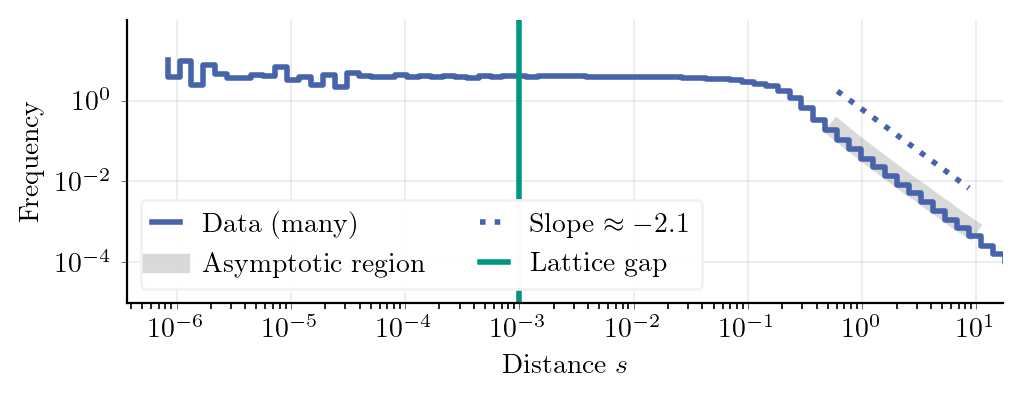

In [218]:
plt.style.use("kitish")
filename = "many.npy"
data1  = np.load(filename)
fig,ax = plt.subplots()

createplot(filename,data1,ax, 0.000996,True,kit.blue, " (many)")

[-3.11907361 -1.47925318]


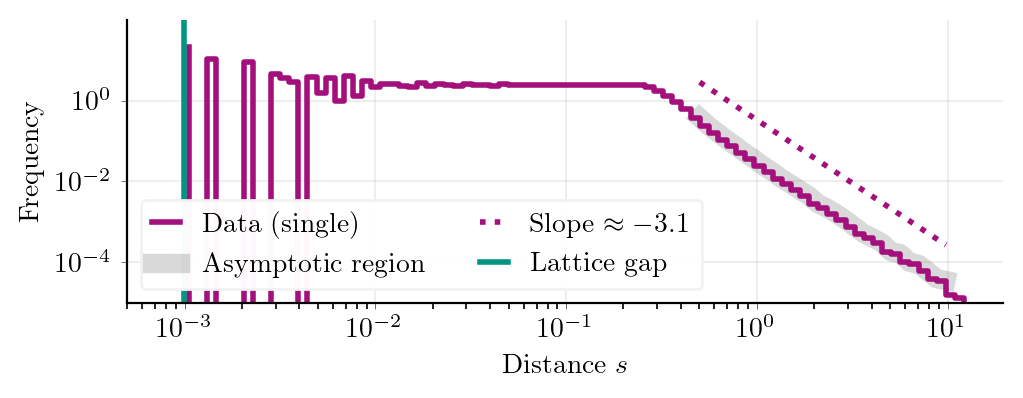

In [219]:
plt.style.use("kitish")
fig,ax = plt.subplots()
filename = "one.npy"
data2  = np.load(filename)
createplot(filename,data2,ax, 0.000996,True,kit.purple," (single)")

In [224]:
def createplots(data1,data2,ax,critdistance=0.1,plotcritdistance = False,label = ["",""]):
    
    p = []
    l = []
    plt.xscale("log")
    plt.yscale("log")
    ax.set_xlabel("Distance $s$")
    ax.set_ylabel("Frequency")
    
    for data,color,offset,lab in zip([data1,data2],[kit.blue,kit.purple],[1,0.01],label):
        tt = np.sort(data)
        x = np.logspace(-1,1,30)
        count,edges = np.histogram(tt,x,density = True)
        c = (edges[1:]+edges[:-1])/2




        tmp, =  ax.step(c,count,color = color)
        p.append(tmp)
        l.append("Data"+lab)
        idx = np.argwhere((0.5<c)&(c<10) & (count>0)).flatten()
        cutc = c[idx]
        cutcount = count[idx]
    
        tmp, = ax.plot(cutc,cutcount,color = kit.black,lw = 7,zorder = -1,alpha = 0.15)

        idx = np.argwhere((0.5<c)&(c<10) & (count>0)).flatten()
        cutc = c[idx]
        cutcount = count[idx]
        
        logx = np.log10(cutc)
        logy = np.log10(cutcount)
        coeffs = np.polyfit(logx,logy,1)
        zz = cutc**coeffs[0]*10**coeffs[1]*10 *offset
        tmp, =ax.plot(cutc,zz,color = color,linestyle = ":")
        p.append(tmp)
        l.append("Slope $\\approx" + "{:.1f}".format(coeffs[0]) + "$")
    

        
        
    ax.legend(tuple(p),tuple(l),ncol = 2)
    ax.set_xlim(0.1,10)
    ax.set_ylim(1e-5,1e2)
    ax.set_yticks([1,1e-2,1e-4])
    
    
    
   
    plt.savefig("both.pdf" )
    print(coeffs)    

[-3.11218575 -1.3592524 ]


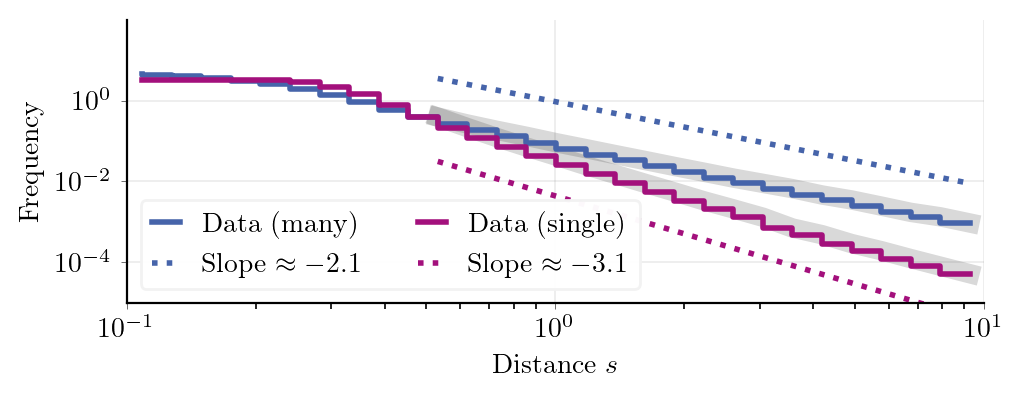

In [225]:

fig,ax = plt.subplots()
createplots(data1,data2,ax, 0.000996,True,[" (many)", " (single)"])